In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('model_building_dataset1.csv')
data.head()

,label,word_len_review,string_len_review,aaa,abc,ability,abit,able,abroad,absolute,...,young,younger,yr,yuck,yum,yummy,yunque,zero,zone,zoo
0,1,0.041580,0.040797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1,0.126299,0.122241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.109148,0.102772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.042620,0.041317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.095634,0.091922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Engineering

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [5]:
model = SelectKBest(score_func=chi2, k='all')
fit = model.fit(data.iloc[:,1:], data.iloc[:,0])
scores = np.around(fit.scores_, 3)
scores

array([7.522, 5.76 , 0.392, ..., 0.911, 0.639, 1.64 ])

In [6]:
idx_cols = list(np.where(scores>0.5)[0])
idx_cols = [x+1 for x in idx_cols]
idx_cols[:5]

[1, 2, 6, 9, 10]

In [7]:
data.shape

(20491, 5003)

In [8]:
data = pd.concat([data.iloc[:,0],data.iloc[:,idx_cols]], axis=1)
data.head()

,label,word_len_review,string_len_review,abit,absolute,absolutely,absolutley,absolutly,abundant,ac,...,yellow,yoga,yoghurt,yogurt,york,yuck,yummy,zero,zone,zoo
0,1,0.041580,0.040797,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1,0.126299,0.122241,0.0,0.0,0.0,0.0,0.0,0.0,0.062472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.109148,0.102772,0.0,0.0,0.0,0.0,0.0,0.0,0.077393,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.042620,0.041317,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.095634,0.091922,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data.shape

(20491, 3340)

# Model Building

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [11]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(16392, 3339) (16392,) (4099, 3339) (4099,)


## 1).Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

+ Since we are going to use One Vs Rest algorithm, set **multi_class='ovr'**
+ Note: since we are using One Vs Rest algorithm we must use **'liblinear' solver** with it.

In [14]:
model = LogisticRegression(class_weight='balanced', multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='ovr',
                   solver='liblinear')

In [15]:
y_train_pred = model.predict(X_train)
print('Accuracy Score: ',round(accuracy_score(y_train, y_train_pred),3))
print('F1 Score: ',round(f1_score(y_train, y_train_pred, average='weighted'),3))
print('Precision Score: ',round(precision_score(y_train, y_train_pred, average='weighted'),3))
print('Recall Score: ',round(recall_score(y_train, y_train_pred, average='weighted'),3))

Accuracy Score:  0.901
F1 Score:  0.899
Precision Score:  0.898
Recall Score:  0.901


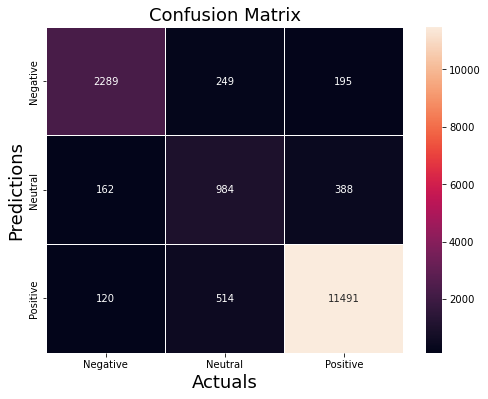

In [16]:
cm = confusion_matrix(y_train, y_train_pred)
dt = {'Negative':list(cm[0]), 'Neutral':list(cm[1]), 'Positive':list(cm[2])}
cm_df = pd.DataFrame(dt, index=['Negative', 'Neutral', 'Positive'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df,annot=True,fmt='.0f', linewidths=1)
plt.ylabel('Predictions', fontsize=18)
plt.xlabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [17]:
y_test_pred = model.predict(X_test)
print('Accuracy Score: ',round(accuracy_score(y_test, y_test_pred),3))
print('F1 Score: ',round(f1_score(y_test, y_test_pred, average='weighted'),3))
print('Precision Score: ',round(precision_score(y_test, y_test_pred, average='weighted'),3))
print('Recall Score: ',round(recall_score(y_test, y_test_pred, average='weighted'),3))

Accuracy Score:  0.85
F1 Score:  0.847
Precision Score:  0.845
Recall Score:  0.85


In [18]:
print('Classification Report: \n',classification_report(y_test, y_test_pred, digits=3))

Classification Report: 
               precision    recall  f1-score   support

          -1      0.753     0.771     0.762       643
           0      0.422     0.373     0.396       437
           1      0.926     0.936     0.931      3019

    accuracy                          0.850      4099
   macro avg      0.700     0.694     0.696      4099
weighted avg      0.845     0.850     0.847      4099



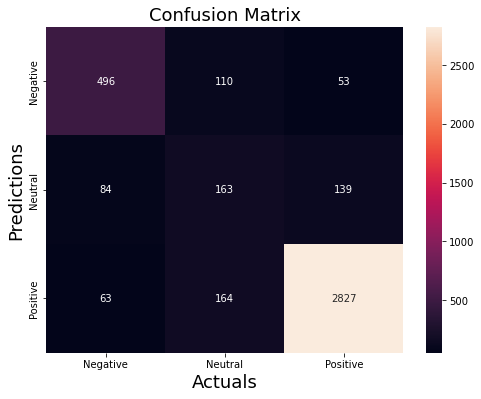

In [19]:
cm = confusion_matrix(y_test, y_test_pred)
dt = {'Negative':list(cm[0]), 'Neutral':list(cm[1]), 'Positive':list(cm[2])}
cm_df = pd.DataFrame(dt, index=['Negative', 'Neutral', 'Positive'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df,annot=True,fmt='.0f')
plt.ylabel('Predictions', fontsize=18)
plt.xlabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## 2).K-NN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
model = KNeighborsClassifier()

kfold = KFold(n_splits=5)
result = cross_val_score(model, X_train, y_train, cv=kfold)
result.mean()

0.7385307355532768

### Hyperparameter Tunning

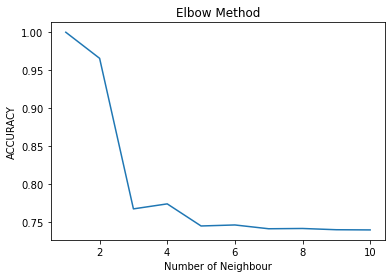

In [22]:
#Elbow Plot
acc = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train , y_train)
    y_predict = knn.predict(X_train)
    acc.append(accuracy_score(y_train , y_predict))
    
plt.plot(range(1, 11), acc)
plt.title('Elbow Method')
plt.xlabel('Number of Neighbour')
plt.ylabel('ACCURACY')
plt.show()

In [23]:
# Hyper parameter Value
kfold = KFold()
n_neighbors = np.array(range(1,10))
param_grid = {'n_neighbors':n_neighbors}

# Hyper parameter tunning using GridSearchCV
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid , cv = kfold, n_jobs=2)
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [24]:
print(grid.best_score_)
print(grid.best_params_)

0.7388967938222806
{'n_neighbors': 6}


In [25]:
para = grid.best_params_

### K-NN Model Building

In [26]:
model = KNeighborsClassifier(n_neighbors=para['n_neighbors'])
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [27]:
y_train_pred = model.predict(X_train)
print('Training Scores:-')
print('Accuracy Score: ',round(accuracy_score(y_train, y_train_pred),3))
print('F1 Score: ',round(f1_score(y_train, y_train_pred, average='weighted'),3))
print('Precision Score: ',round(precision_score(y_train, y_train_pred, average='weighted'),3))
print('Recall Score: ',round(recall_score(y_train, y_train_pred, average='weighted'),3))

y_test_pred = model.predict(X_test)
print('\nTesting Scores:-')
print('Accuracy Score: ',round(accuracy_score(y_test, y_test_pred),3))
print('F1 Score: ',round(f1_score(y_test, y_test_pred, average='weighted'),3))
print('Precision Score: ',round(precision_score(y_test, y_test_pred, average='weighted'),3))
print('Recall Score: ',round(recall_score(y_test, y_test_pred, average='weighted'),3))

Training Scores:-
Accuracy Score:  0.746
F1 Score:  0.649
Precision Score:  0.772
Recall Score:  0.746

Testing Scores:-
Accuracy Score:  0.738
F1 Score:  0.632
Precision Score:  0.665
Recall Score:  0.738


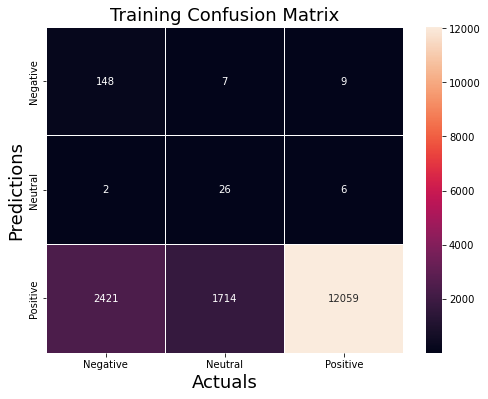

In [28]:
cm = confusion_matrix(y_train, y_train_pred)
dt = {'Negative':list(cm[0]), 'Neutral':list(cm[1]), 'Positive':list(cm[2])}
cm_df = pd.DataFrame(dt, index=['Negative', 'Neutral', 'Positive'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df,annot=True,fmt='.0f', linewidths=1)
plt.ylabel('Predictions', fontsize=18)
plt.xlabel('Actuals', fontsize=18)
plt.title('Training Confusion Matrix', fontsize=18)
plt.show()

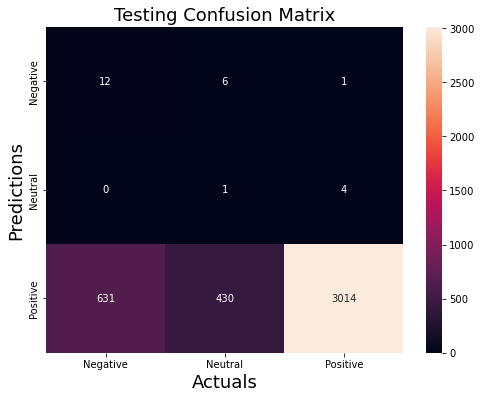

In [29]:
cm = confusion_matrix(y_test, y_test_pred)
dt = {'Negative':list(cm[0]), 'Neutral':list(cm[1]), 'Positive':list(cm[2])}
cm_df = pd.DataFrame(dt, index=['Negative', 'Neutral', 'Positive'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df,annot=True,fmt='.0f')
plt.ylabel('Predictions', fontsize=18)
plt.xlabel('Actuals', fontsize=18)
plt.title('Testing Confusion Matrix', fontsize=18)
plt.show()

## 3).Naive Bayes classifier 

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
model = MultinomialNB()

kfold = KFold(n_splits=5)
result = cross_val_score(model, data.iloc[:,1:], data.iloc[:,0], cv=kfold)
result.mean()

0.826168484236713

### Hyperparameter Tunning

In [32]:
# Hyper parameter Value
kfold = KFold()
alpha = np.arange(0.1, 1.1, 0.1)
param_grid = {'alpha':alpha}

# Hyper parameter tunning using GridSearchCV
model = MultinomialNB()
grid = GridSearchCV(estimator=model, param_grid=param_grid , cv = kfold, n_jobs=2)
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=MultinomialNB(), n_jobs=2,
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [33]:
print(grid.best_score_)
print(grid.best_params_)

0.8352245072410616
{'alpha': 0.1}


In [34]:
para = grid.best_params_

### Naive Bayes Model Building

In [35]:
model = MultinomialNB(alpha=para['alpha'])

model.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [36]:
y_train_pred = model.predict(X_train)
print('Training Scores:-')
print('Accuracy Score: ',round(accuracy_score(y_train, y_train_pred),3))
print('F1 Score: ',round(f1_score(y_train, y_train_pred, average='weighted'),3))
print('Precision Score: ',round(precision_score(y_train, y_train_pred, average='weighted'),3))
print('Recall Score: ',round(recall_score(y_train, y_train_pred, average='weighted'),3))

y_test_pred = model.predict(X_test)
print('\nTesting Scores:-')
print('Accuracy Score: ',round(accuracy_score(y_test, y_test_pred),3))
print('F1 Score: ',round(f1_score(y_test, y_test_pred, average='weighted'),3))
print('Precision Score: ',round(precision_score(y_test, y_test_pred, average='weighted'),3))
print('Recall Score: ',round(recall_score(y_test, y_test_pred, average='weighted'),3))

Training Scores:-
Accuracy Score:  0.847
F1 Score:  0.802
Precision Score:  0.842
Recall Score:  0.847

Testing Scores:-
Accuracy Score:  0.832
F1 Score:  0.782
Precision Score:  0.779
Recall Score:  0.832


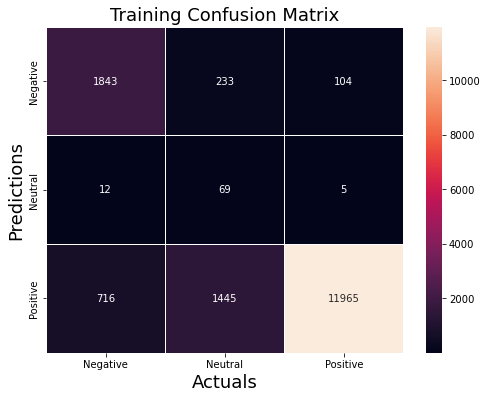

In [37]:
cm = confusion_matrix(y_train, y_train_pred)
dt = {'Negative':list(cm[0]), 'Neutral':list(cm[1]), 'Positive':list(cm[2])}
cm_df = pd.DataFrame(dt, index=['Negative', 'Neutral', 'Positive'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df,annot=True,fmt='.0f', linewidths=1)
plt.ylabel('Predictions', fontsize=18)
plt.xlabel('Actuals', fontsize=18)
plt.title('Training Confusion Matrix', fontsize=18)
plt.show()

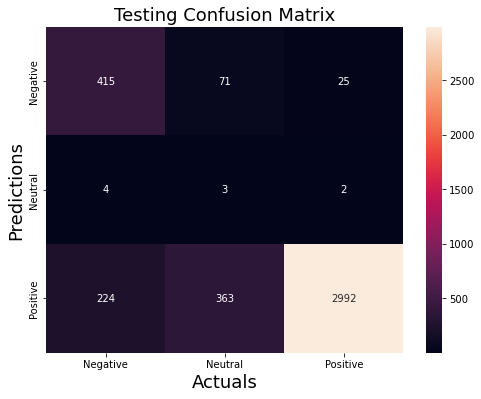

In [38]:
cm = confusion_matrix(y_test, y_test_pred)
dt = {'Negative':list(cm[0]), 'Neutral':list(cm[1]), 'Positive':list(cm[2])}
cm_df = pd.DataFrame(dt, index=['Negative', 'Neutral', 'Positive'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df,annot=True,fmt='.0f')
plt.ylabel('Predictions', fontsize=18)
plt.xlabel('Actuals', fontsize=18)
plt.title('Testing Confusion Matrix', fontsize=18)
plt.show()

## 4). Decision Tree

In [39]:
from sklearn.tree import  DecisionTreeClassifier

In [40]:
model = DecisionTreeClassifier()

kfold = KFold(n_splits=5)
result = cross_val_score(model, X_train, y_train, cv=kfold)
result.mean()
# model.fit(X_train, y_train)

0.7330408104823697

### Hyperparameter Tunning

In [ ]:
params = {'criterion':['entropy','gini'] ,'max_depth': [2,4,6,8,10,12], 'min_samples_split': [2,3,4]}

model_test = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=model_test,param_grid=params)
gcv.fit(X_train,y_train)

In [ ]:
print(gcv.best_score_)
print(gcv.best_params_)

In [ ]:
para = gcv.best_params_

### Decision Tree Model Building

In [ ]:
model = DecisionTreeClassifier(criterion=para['criterion'], max_depth=para['max_depth'], 
                               min_samples_split=para['min_samples_split'])

model.fit(X_train, y_train)

In [ ]:
y_train_pred = model.predict(X_train)
print('Training Scores:-')
print('Accuracy Score: ',round(accuracy_score(y_train, y_train_pred),3))
print('F1 Score: ',round(f1_score(y_train, y_train_pred, average='weighted'),3))
print('Precision Score: ',round(precision_score(y_train, y_train_pred, average='weighted'),3))
print('Recall Score: ',round(recall_score(y_train, y_train_pred, average='weighted'),3))

y_test_pred = model.predict(X_test)
print('\nTesting Scores:-')
print('Accuracy Score: ',round(accuracy_score(y_test, y_test_pred),3))
print('F1 Score: ',round(f1_score(y_test, y_test_pred, average='weighted'),3))
print('Precision Score: ',round(precision_score(y_test, y_test_pred, average='weighted'),3))
print('Recall Score: ',round(recall_score(y_test, y_test_pred, average='weighted'),3))

In [ ]:
cm = confusion_matrix(y_train, y_train_pred)
dt = {'Negative':list(cm[0]), 'Neutral':list(cm[1]), 'Positive':list(cm[2])}
cm_df = pd.DataFrame(dt, index=['Negative', 'Neutral', 'Positive'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df,annot=True,fmt='.0f', linewidths=1)
plt.ylabel('Predictions', fontsize=18)
plt.xlabel('Actuals', fontsize=18)
plt.title('Training Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
dt = {'Negative':list(cm[0]), 'Neutral':list(cm[1]), 'Positive':list(cm[2])}
cm_df = pd.DataFrame(dt, index=['Negative', 'Neutral', 'Positive'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df,annot=True,fmt='.0f')
plt.ylabel('Predictions', fontsize=18)
plt.xlabel('Actuals', fontsize=18)
plt.title('Testing Confusion Matrix', fontsize=18)
plt.show()